In [1]:
!pip install -U numpy pandas plotnine

# Week 03 Assignments

In this assignment, you will be creating some basic plots using plotnine and managing data using Pandas.

1. Import the package pandas as pd and numpy as np.

In [2]:
import numpy as np
import pandas as pd
import plotnine as pn

## NCBirths dataset

2. Execute the cell below to download and import the dataset NCBirths from Dr. Donatello's webpage. Read about the dataset on the [metadata webpage](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.norcalbiostat.com%2Fdata%2Fncbirthscodebook) for this dataset.

In [3]:
ncbirths = pd.read_csv("https://www.norcalbiostat.com/data/NCbirths.csv")

In [4]:
ncbirths

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,47.0,42,mature mom,40.0,full term,10.0,not married,26.0,8.44,not low,male,nonsmoker,not white
996,34.0,42,mature mom,38.0,full term,18.0,not married,20.0,6.19,not low,female,nonsmoker,white
997,39.0,45,mature mom,40.0,full term,15.0,not married,32.0,6.94,not low,female,nonsmoker,white
998,55.0,46,mature mom,31.0,premie,8.0,not married,25.0,4.56,low,female,nonsmoker,not white


3. Create a table of marital status `marital` from `ncbirths`.

In [5]:
ncbirths["marital"].value_counts

<bound method IndexOpsMixin.value_counts of 0          married
1          married
2          married
3          married
4          married
          ...     
995    not married
996    not married
997    not married
998    not married
999    not married
Name: marital, Length: 1000, dtype: object>

4. Create a bar chart of marital status.

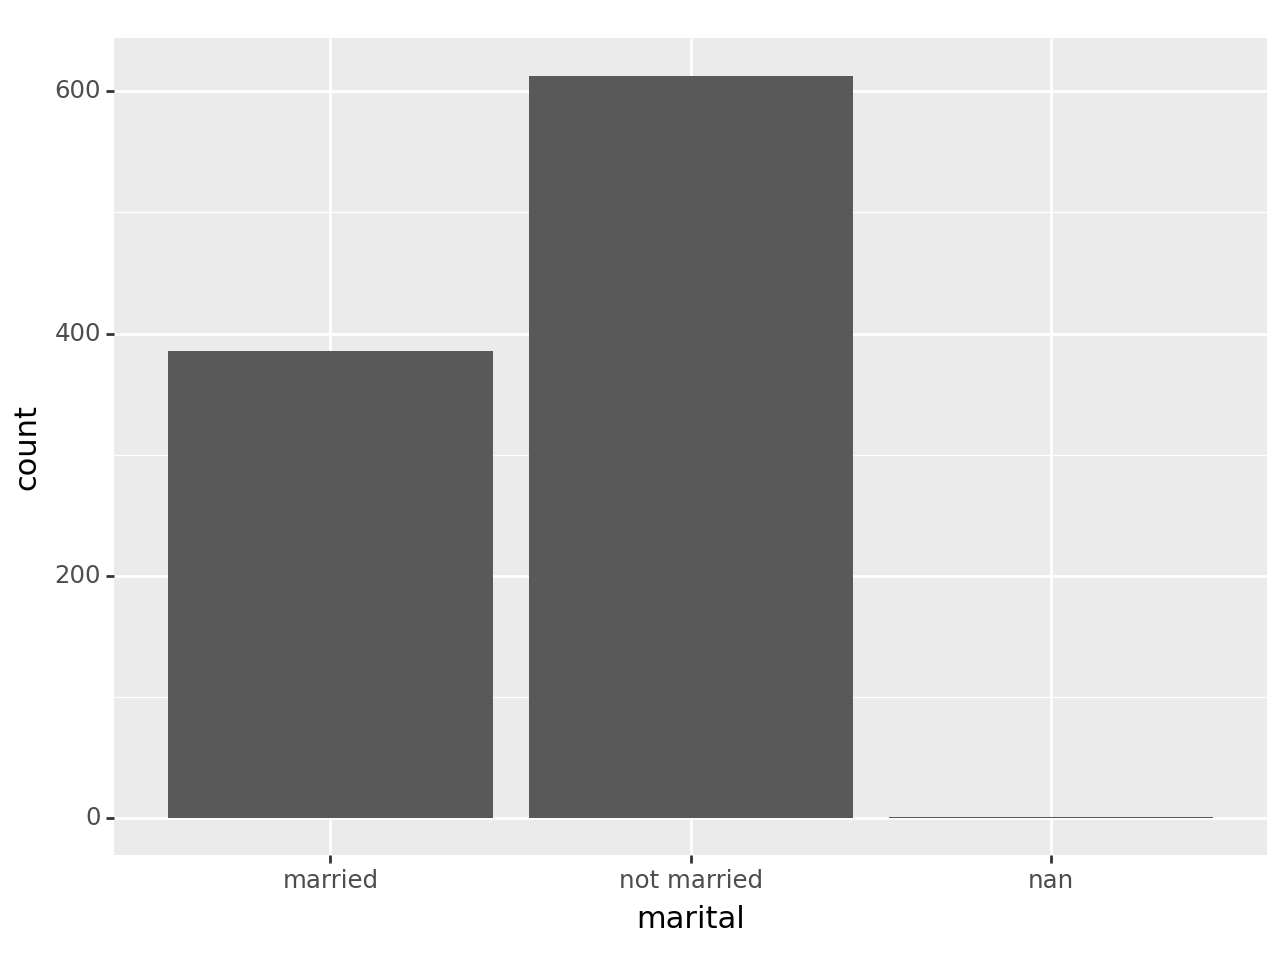

In [6]:
p1 = pn.ggplot(data = ncbirths) + pn.geom_bar(pn.aes(x = "marital"))
p1.draw()

5.  Create a histogram of mother's age `mage` with an overlaid density plot in a different color. Be sure that both density curve and histogram can be seen.

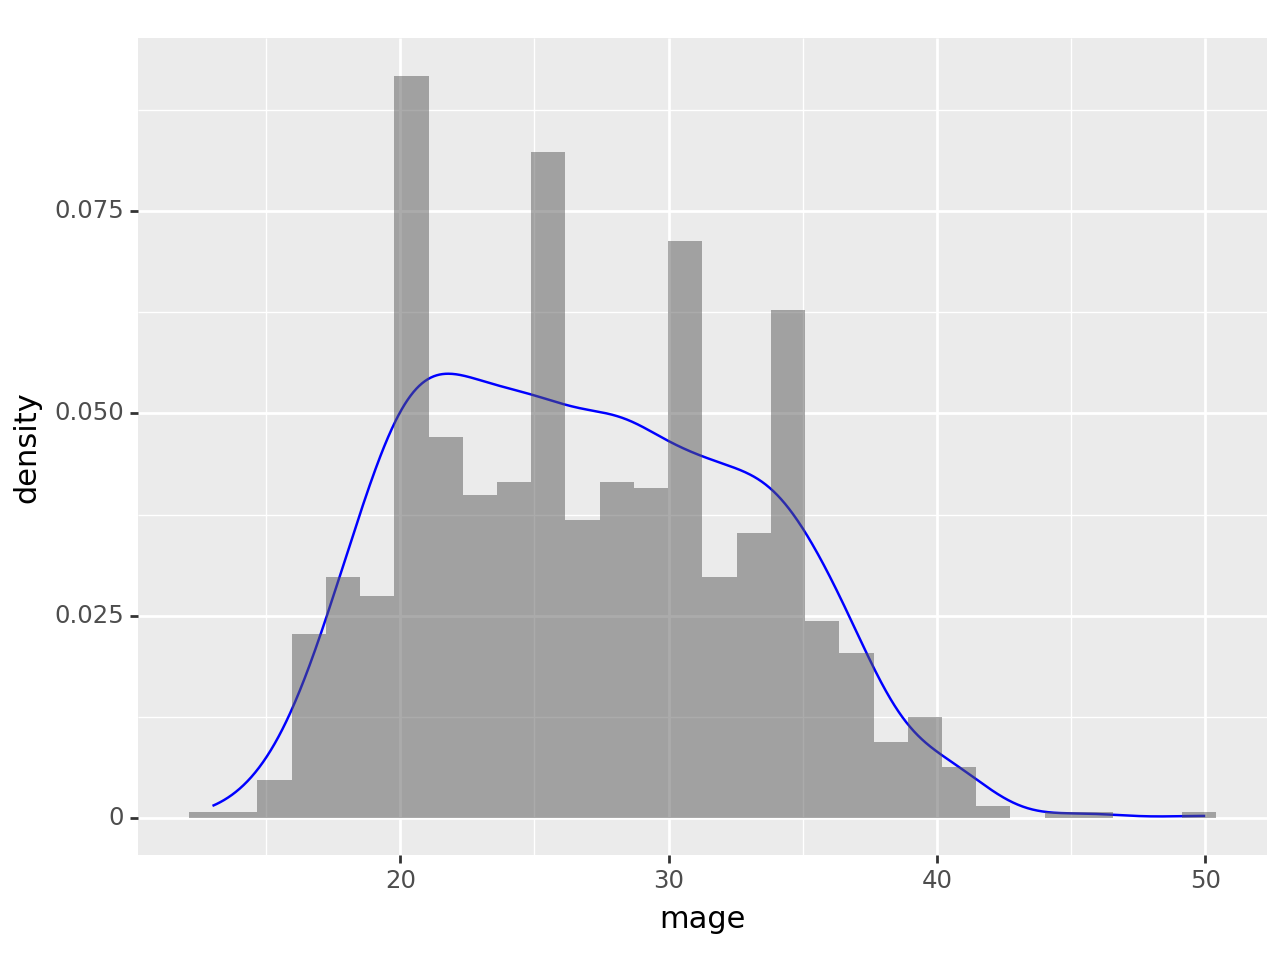

In [7]:
p = (pn.ggplot(data = ncbirths)
    + pn.geom_density(pn.aes(x = "mage"), color = "blue")
    + pn.geom_histogram(pn.aes(x = "mage",  y = pn.after_stat("density")), alpha = 0.5, bins = 30))
p.draw()

6.  Create a boxplot of weight of the baby `weight` for each value in the categorical variable `habit`.

In [ ]:
p = (pn.ggplot(data = ncbirths)
    + pn.geom_boxplot(pn.aes(x = "habit", y = "weight", fill = "habit")))
p.draw()

7. Create a two-way cross tabulated table of maturity status `mature` against smoking `habit`.

In [ ]:
pd.crosstab(ncbirths["mature"], ncbirths["habit"])

8. Create a grouped bar chart that reflects the frequencies you calculated above.

In [ ]:
df =  ncbirths.dropna(subset = ["mature", "habit"])
p = (pn.ggplot(data = df)
    + pn.geom_bar(pn.aes(x = "mature", fill = "habit")))
p.draw()

In [ ]:
p  = pn.ggplot(data = ncbirths) + pn.geom_bar(pn.aes(x='mature', fill='habit'), position='dodge') #idea from https://ggplot2.tidyverse.org/reference/position_dodge.html
p.draw()

9. Create a proportion table of smoking habit _within_ maturity status. Round to 3 digits.

In [ ]:
pd.crosstab(ncbirths["mature"], ncbirths["habit"], normalize = "all").round(3)

10. Create a scatterplot of length of pregnancy in `weeks` and the babies `weight`. Include a best fit linear model line in the color of your choice.

In [ ]:
p = (pn.ggplot(ncbirths, pn.aes(x = "weeks", y = "weight")) #scatterplot without linear model line
    + pn.geom_point()
    + pn.labs(x = "length of pregnancy in weeks", y = "babies weight")
    + pn.geom_smooth(method='lm', color='blue'))
p.draw()

In [ ]:
p = (pn.ggplot(ncbirths, pn.aes(x = "weeks", y = "weight")) #scatterplot with linear model line
    + pn.geom_point()
    + pn.geom_smooth(se = False, color = "red")
    + pn.scale_x_log10()
    + pn.scale_y_log10()
    + pn.labs(x = "length of pregnancy in weeks", y = "babies weight"))
p.draw()

11. Create a grouped boxplot of baby `weight` by mothers smoking `habit`. Make sure you `fill` the boxes by `habit` as well.

In [ ]:
df = ncbirths.dropna(subset = "weight")
p = (pn.ggplot(df, pn.aes(x = "habit", y = "weight", fill = "habit"))
    + pn.geom_boxplot(width = 0.10))
p.draw()

12. Replicate the same plot as above, but overlay a violin plot and change the transparency of both violin and boxplot layers.

In [ ]:
df = ncbirths.dropna(subset = "weight")
p = (pn.ggplot(df, pn.aes(x = "habit", y = "weight", fill = "habit"))
    + pn.geom_boxplot(width = 0.10, alpha = 0.5)
    + pn.geom_violin(alpha = 0.5))
p.draw()

13. Create an overlaid density plots of weight `gained` by babies `gender`. Do not apply a `fill`, only use the `color` aesthetic.

In [ ]:
p = (pn.ggplot(data = ncbirths)
    + pn.geom_density(pn.aes(x = "gained", color = "gender")))
p.draw()

## NYC Flights

Execute the cell below to download and import the dataset `nycflights`. Read about the dataset on the [metadata webpage](https://vincentarelbundock.github.io/Rdatasets/doc/nycflights13/flights.html) for this dataset.

In [ ]:
nycflights = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/nycflights13/flights.csv")

In [ ]:
nycflights

14.  Index `nycflights` to extract the following variables: `origin`, `distance`, `air_time`, and `dest`. Save the resulting dataset as a new variable named `f1`.

In [ ]:
f1 = nycflights[['origin', 'distance', 'air_time', 'dest']]

In [ ]:
f1

15. From the `f1` dataset create a boolean Series to select only the flights whose destination `dest` is Atlanta (ATL). Index `f1` to create a new dataset of just Atlanta bound flights and save this result as `f2`. _Hint: the destination variable is of type `string`, so think carefully about how you specify ATL_.

In [ ]:
Atlanta_Flights = f1["dest"] == "ATL"
f2 = f1[Atlanta_Flights]

In [ ]:
print("--------------------------------------------------------")
print("Atlanta Flights:")
print(Atlanta_Flights)
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("f2:")
print(f2)
print("--------------------------------------------------------")

16. From the `f2` dataset create a new variable `speed` that calculates speed of the plane as `distance / air_time * 60`. Save the calculation within `f2`.

In [ ]:
f2.loc[:, 'speed'] = (f2['distance'] / f2['air_time']) * 60

In [ ]:
f2['speed'] = (f2['distance'] / f2['air_time']) * 60

In [ ]:
f2

17. Use plotnine to make a plot of the planes speed on it's way to Atlanta using a histogram.

In [ ]:
p = pn.ggplot(data = f2) + pn.geom_histogram(pn.aes(x='speed'))
p.draw()

In [ ]:
p = pn.ggplot(data = f2) + pn.geom_histogram(pn.aes(x="speed"), color = "pink")
p.draw()

In [ ]:
plane_speed_histogram = (
    pn.ggplot(data=f2) +
    pn.geom_histogram(pn.aes(x="speed"), bins=50, fill="blue") +
    pn.theme_minimal() +
    pn.ggtitle("Histogram of Plane Speed to Atlanta") + #https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/
    pn.xlab("Speed (miles per hour)") + #https://www.geeksforgeeks.org/matplotlib-pyplot-xlabels-in-python/
    pn.ylab("Frequency")
)
plane_speed_histogram.draw()

18. The three airports in the NYC region are all pretty close together. Do they all have the same travel time to Chicago O'Hare (ORD)? Use the same tactic as you did above by subsetting to the desired destination, then create overlapping density plots of `air_time` where each density plot is colored (or filled) by the variable `origin`.

In [ ]:
p = pn.ggplot(data = f2) + pn.geom_density(pn.aes(x="air_time", fill="origin"), alpha=0.5)
p.draw()

## Challenge question (1 point extra credit)

1. Repeat the process above, but when creating overlapping density plots, instead of `air_time`, define and use `speed` to make the density plots.

In [ ]:
p = pn.ggplot(data = f2) + pn.geom_density(pn.aes(x="speed", fill="origin"), alpha=0.5)
p.draw()
